# Preliminary Work for uncleaned Dataset `USvideos.csv`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# read data
df_main = pd.read_csv('./Merged_USvideos.csv')
print(df_main.shape)
df_main.head(3)

(40949, 17)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy


In [3]:
# limit features to several interesting columns
df = df_main[['publish_time','views','likes','dislikes','comment_count']].copy()

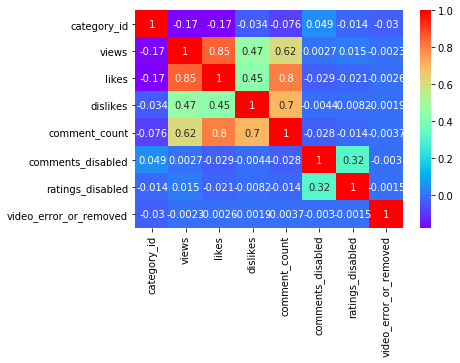

In [4]:
corr = df_main.corr()
plt.Figure(figsize=(16,10))
sns.heatmap(corr, annot=True,cmap='rainbow')

In [5]:
# Top 10 channel titles with amount of views
df_channel = df_main[['channel_title','views']].copy()
df_channel.groupby('channel_title')['views'].sum().sort_values(ascending=False).head(10)

channel_title
ChildishGambinoVEVO            3758488765
ibighit                        2235906679
Dude Perfect                   1870085178
Marvel Entertainment           1808998971
ArianaGrandeVevo               1576959172
MalumaVEVO                     1551515831
jypentertainment               1486972132
Sony Pictures Entertainment    1432374398
FoxStarHindi                   1238609854
BeckyGVEVO                     1182971286
Name: views, dtype: int64

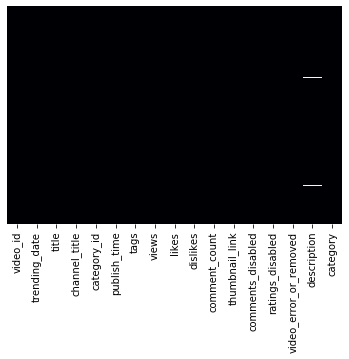

In [6]:
sns.heatmap(df_main.isnull(),yticklabels=False,cbar=False,cmap='magma')

# Baseline Error

In [7]:
df2 = df_main.copy()

In [8]:
df2['likes_views_ratio'] = df2.likes/df.views
df2.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,likes_views_ratio
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,0.076869
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,0.040179
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,0.045758


In [9]:
(df2['likes_in_views'],bins) = pd.qcut(df2.likes_views_ratio,3,labels=['Bad','Average','Good'],retbins=True)
df2.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,likes_views_ratio,likes_in_views
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,0.076869,Good
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,0.040179,Good


In [10]:
print(bins)
df2.likes_in_views.value_counts().sort_index()

[0.         0.01953458 0.03940482 0.29046646]


Bad        13650
Average    13649
Good       13650
Name: likes_in_views, dtype: int64

In [11]:
baseline_error = 13650/(13650+13649+13650)
print(baseline_error)

0.3333414735402574


In [12]:
#split data
(df_train,df_test) = train_test_split(df2,
                                     train_size=0.8,
                                     test_size=0.2,
                                     random_state=0)

In [13]:
# assign features and target
features_train = df_train.iloc[:,0:-2]
features_test  = df_test.iloc[:,0:-2]
targets_train = df_train.iloc[:,-1]
targets_test = df_test.iloc[:,-1]

In [14]:
targets_train.value_counts()

Average    10947
Good       10912
Bad        10900
Name: likes_in_views, dtype: int64

In [15]:
baseline_error = 10912/(10947+10912+10900)
print(baseline_error)

0.33309930095546264


# Top categories of Trending Videos

In [23]:
df_main['category'].value_counts().head(10)

Entertainment           9964
Music                   6472
Howto & Style           4146
Comedy                  3457
People & Blogs          3210
News & Politics         2487
Science & Technology    2401
Film & Animation        2345
Sports                  2174
Education               1656
Name: category, dtype: int64